<a href="https://colab.research.google.com/github/kandkurteram/course-v3/blob/master/RamK_SecondDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
from fastai.vision import *

In [0]:
classes = ['teddies','grizzly','black']

In [5]:
path = Path(base_dir + 'data/bears')
print(path)

/content/gdrive/My Drive/fastai-v3/data/bears


In [6]:
for c in classes:
  print(c)
  file = 'urls_' + c + '.csv'
  print(file)
  dest = path/c
  print(dest)
  #download_images(path/file, dest, max_pics=200)
  #verify_images(path/c, delete=True, max_size = 500)

teddies
urls_teddies.csv
/content/gdrive/My Drive/fastai-v3/data/bears/teddies
grizzly
urls_grizzly.csv
/content/gdrive/My Drive/fastai-v3/data/bears/grizzly
black
urls_black.csv
/content/gdrive/My Drive/fastai-v3/data/bears/black


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['black', 'grizzly', 'teddies']

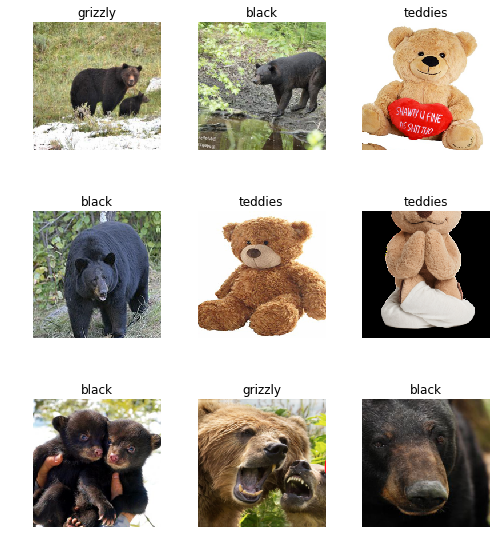

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
len(data.train_ds)

222

In [11]:
len(data.valid_ds)

55

In [12]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27972465.13it/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.146078,0.471564,0.236364,00:38
1,0.695272,0.117519,0.018182,00:04
2,0.494702,0.082186,0.036364,00:04
3,0.383787,0.083374,0.036364,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

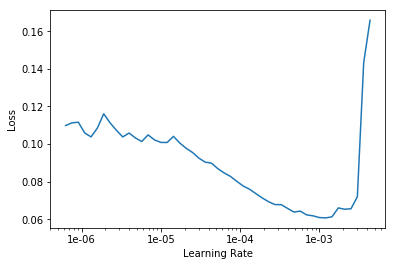

In [17]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(2e-5, 2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.055546,0.108773,0.036364,00:04
1,0.049315,0.087212,0.036364,00:04


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

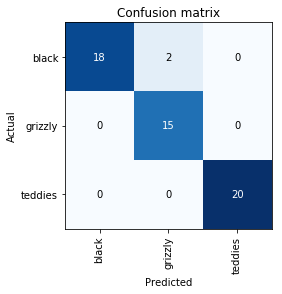

In [24]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

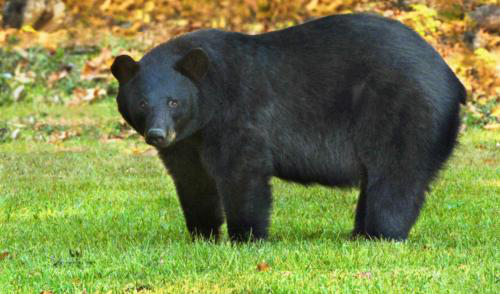

In [27]:
img = open_image(path/'black'/'00000001.jpg')
img

In [0]:
learn = load_learner(path)

In [29]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category black

In [30]:
outputs

tensor([9.9986e-01, 1.2974e-04, 5.4950e-06])